In [10]:
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc


ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

In [32]:

# 使用例
table_name = 'HistoryVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2025)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for y in years:
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  columns_to_drop = [ 'key_program_id','key_horse_id','desc_race_no', 'desc_horse_no', 'upd']
  df = df_summary.drop(columns=columns_to_drop)
  dict_statistics[y] = df

25


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dict_statistics, rows, cols, dpi=80):
    """
    指定された辞書の各DataFrameのヒストグラムをプロットする関数です。

    Args:
        dict_statistics: プロット対象のDataFrameを含む辞書。
        rows: グラフの行数。
        cols: グラフの列数。
        dpi: グラフの解像度。

    Returns:
        None
    """
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for year, df in dict_statistics.items():
        print(f"{year}")
        # グラフのサイズを指定
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*3), dpi=dpi)

        # 各列のヒストグラムをプロット
        for i, column in enumerate(df.columns):
            ax = axes[i // cols, i % cols]
            df[column].hist(ax=ax, bins=20)  # ヒストグラムのビンの数を調整可能
            ax.set_title(column)

        # グラフのレイアウト調整
        plt.tight_layout()
        plt.suptitle(f"Histograms for Year {year}", fontsize=14)

        # グラフの保存 (必要に応じて)
        # plt.savefig(f"histograms_{year}.png")
        plt.show()



2000


<Figure size 640x480 with 0 Axes>

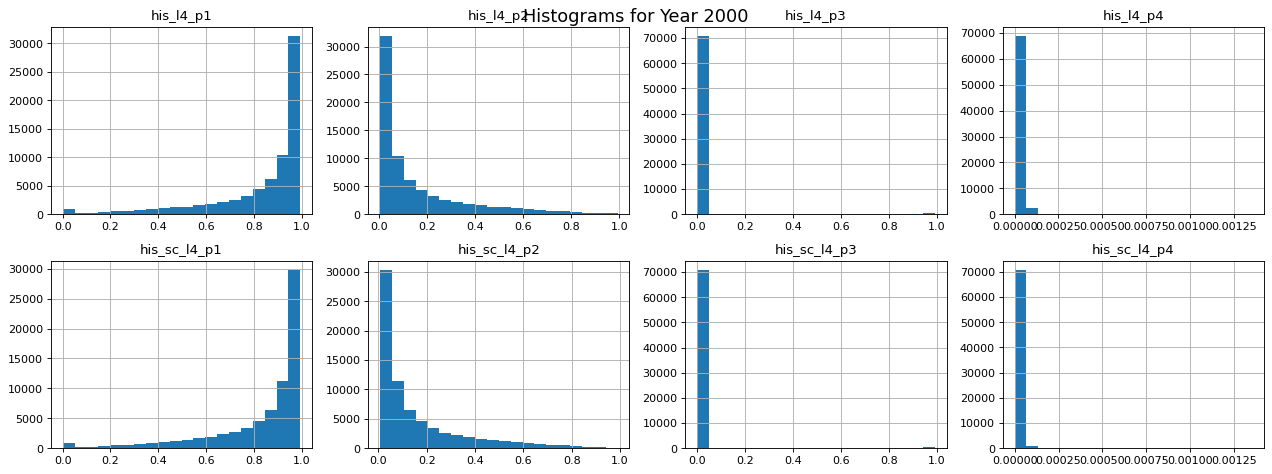

2001


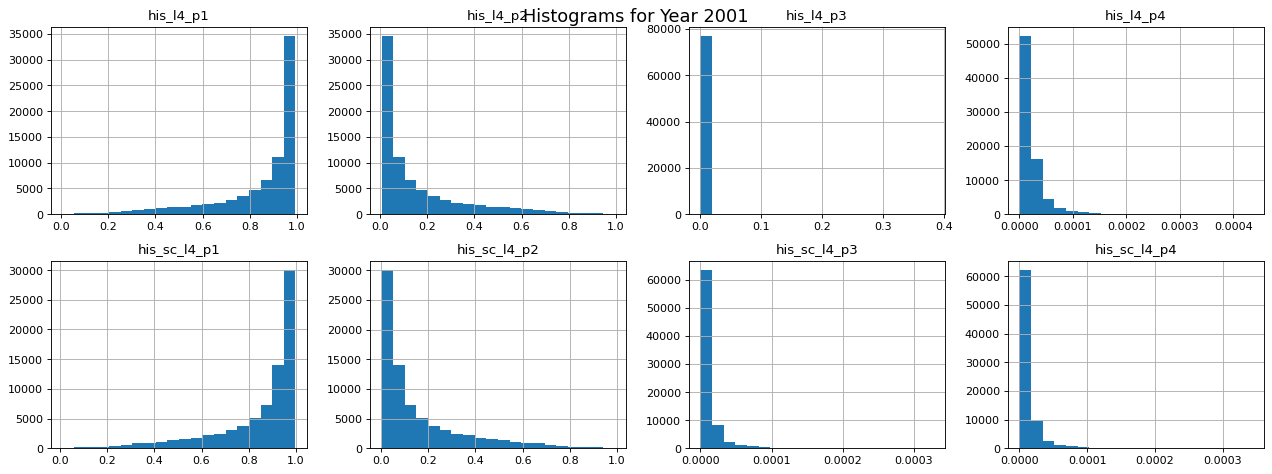

2002


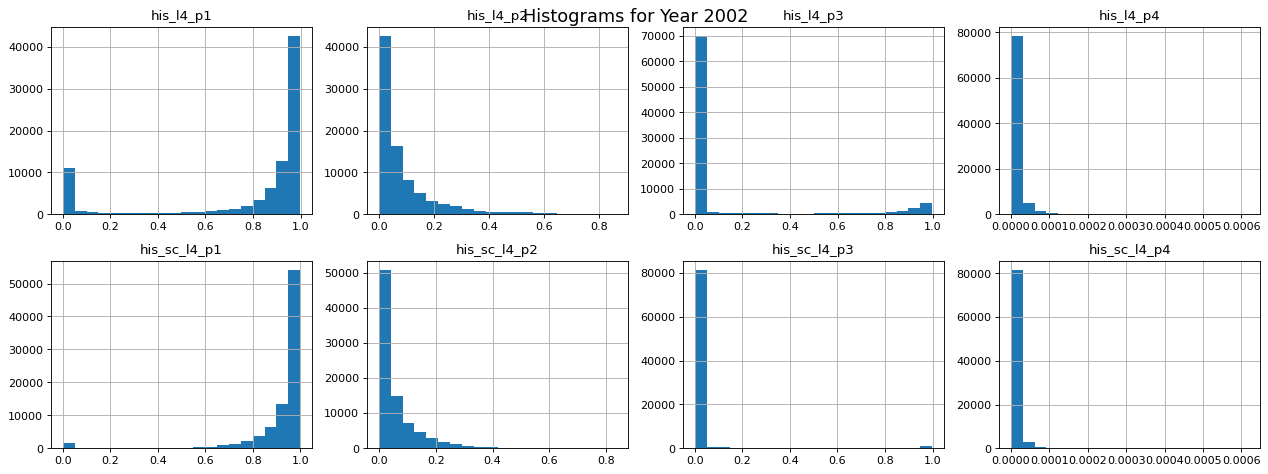

2003


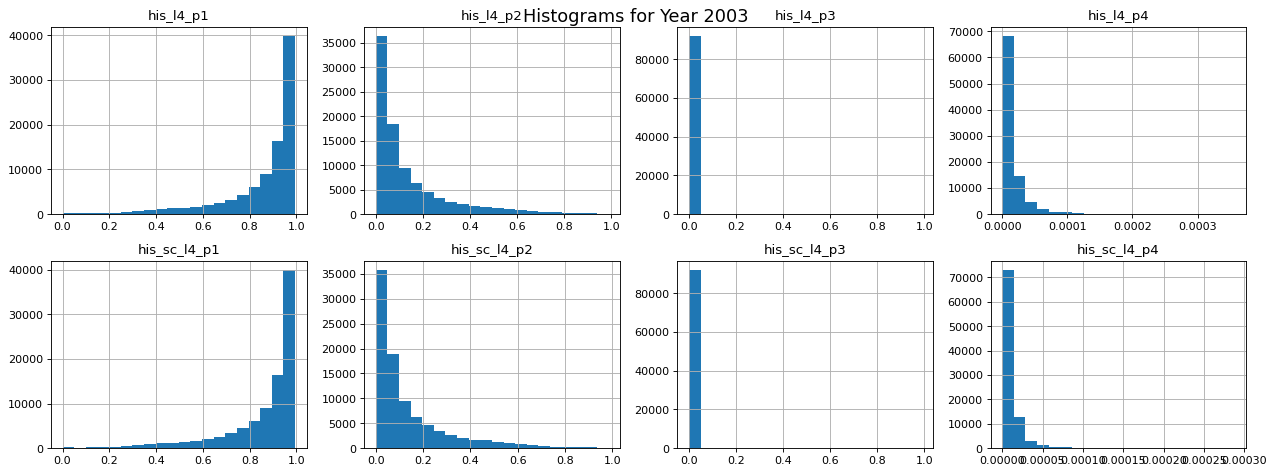

2004


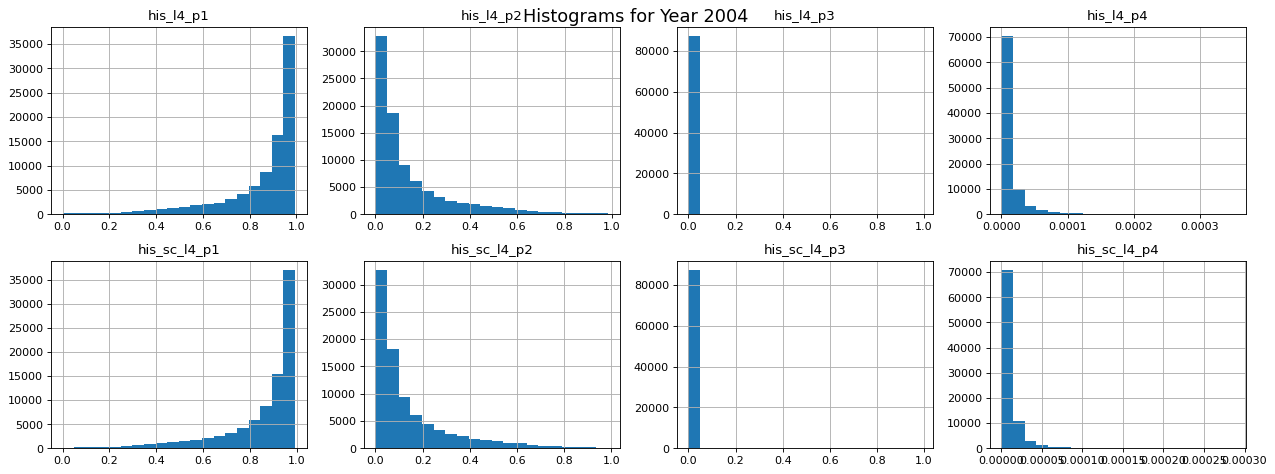

2005


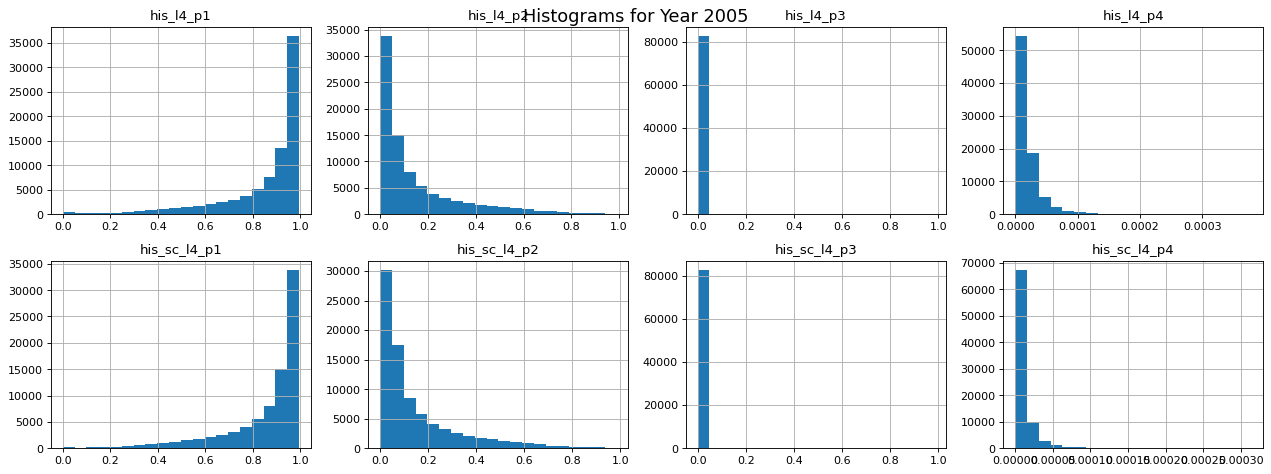

2006


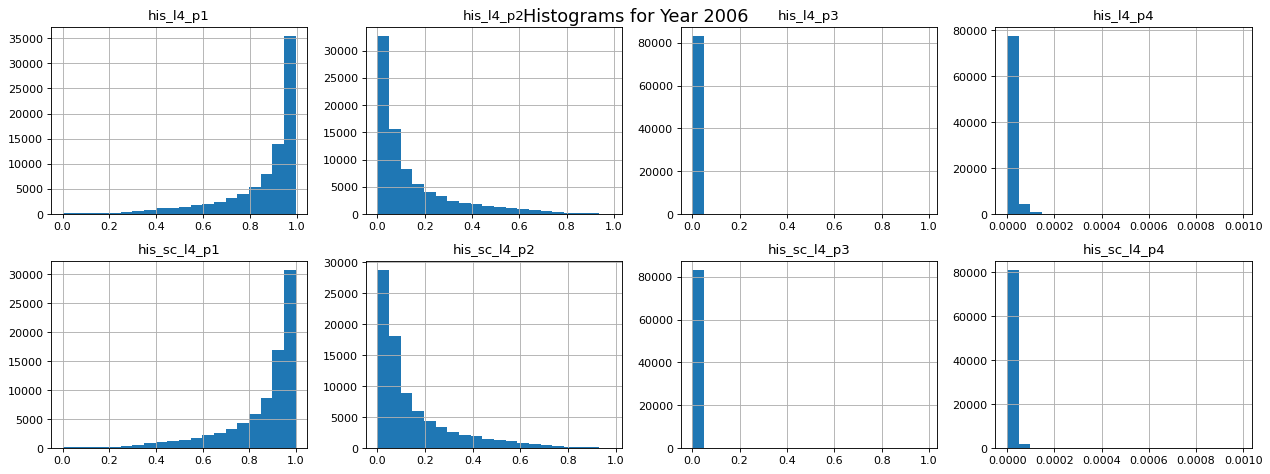

2007


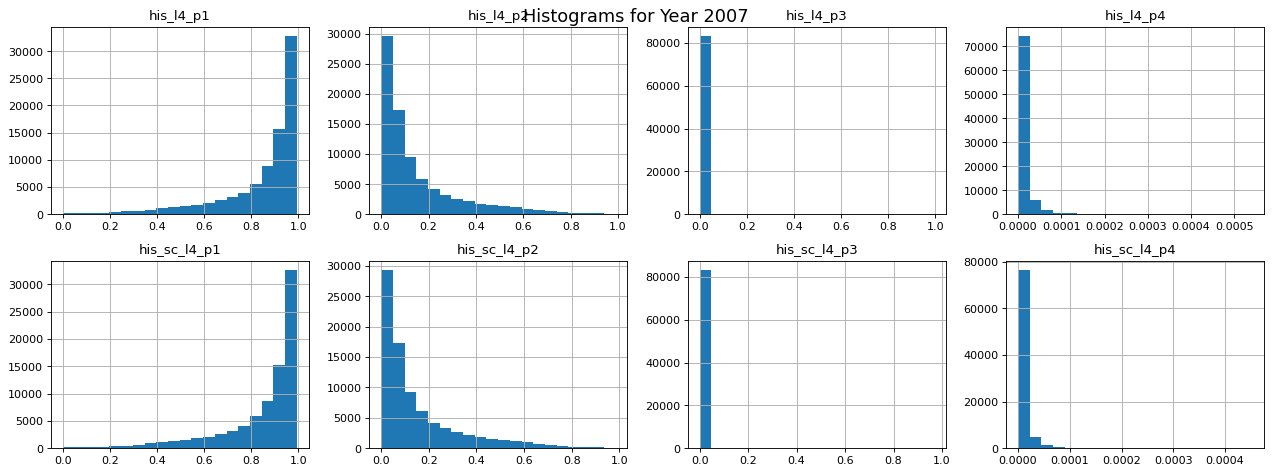

2008


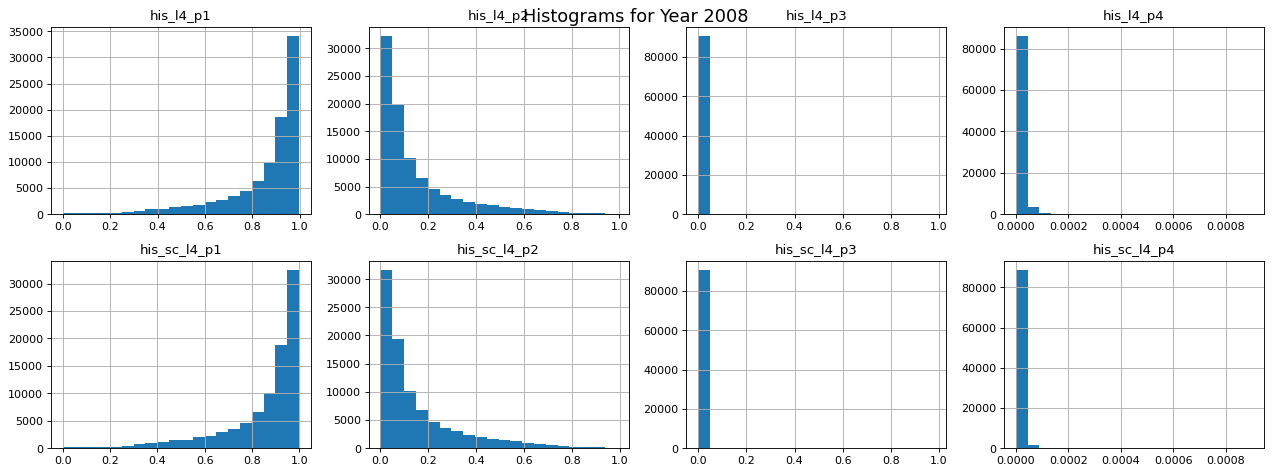

2009


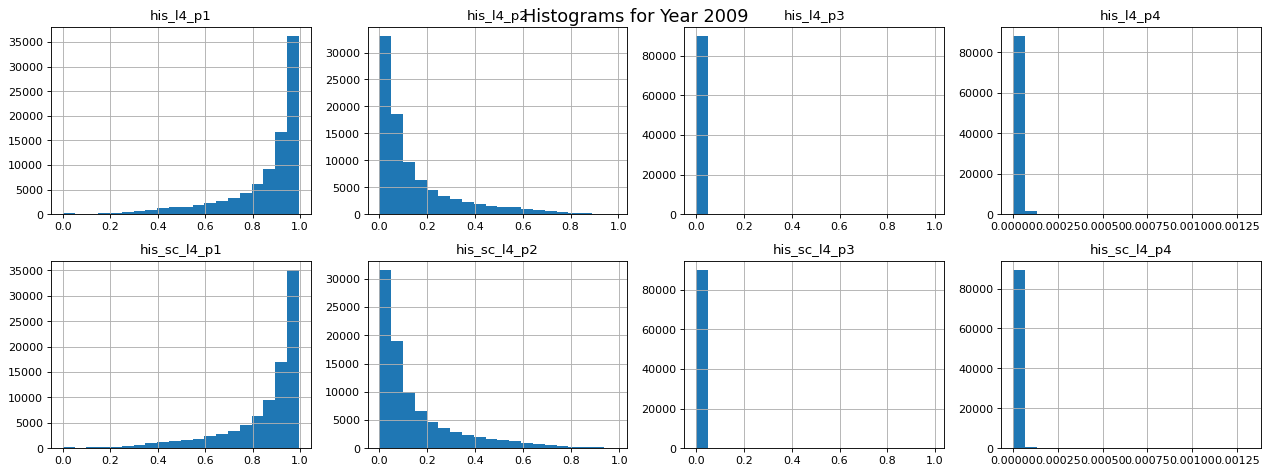

2010


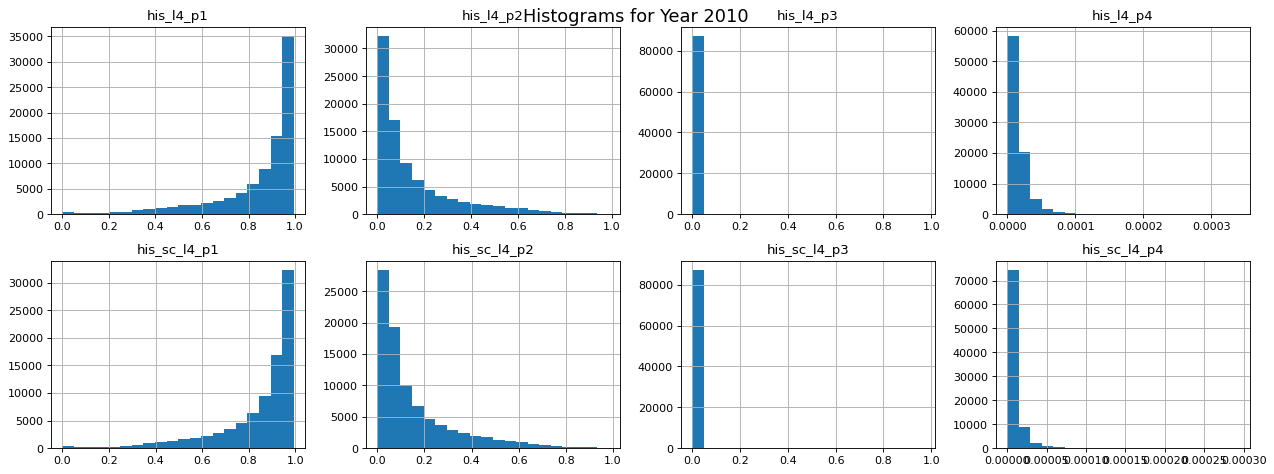

2011


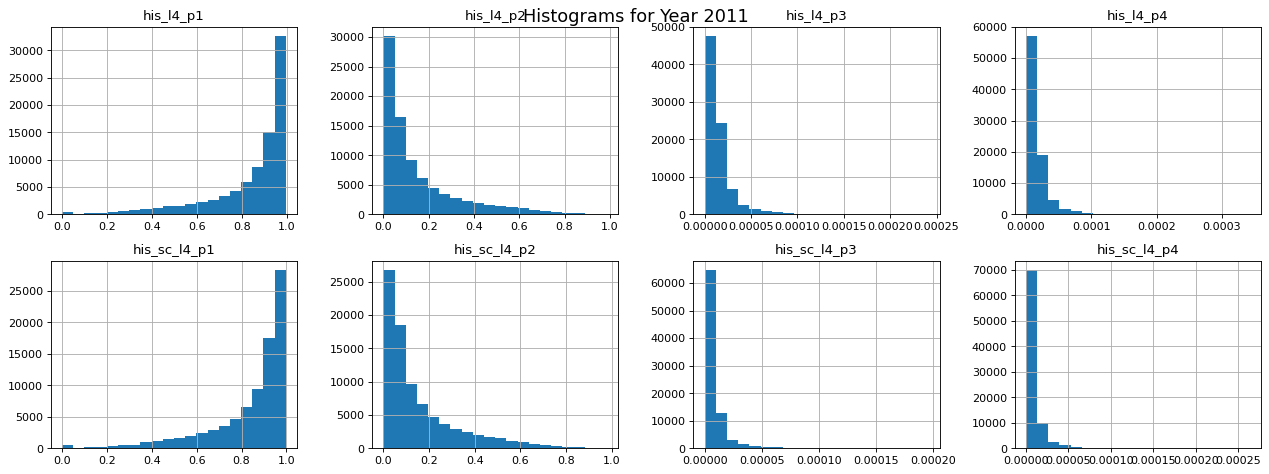

2012


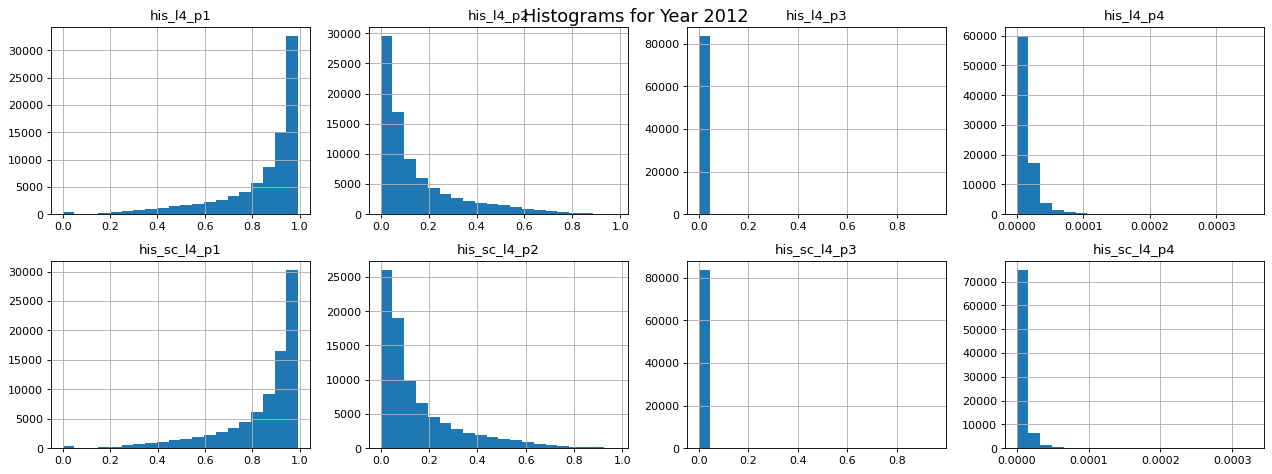

2013


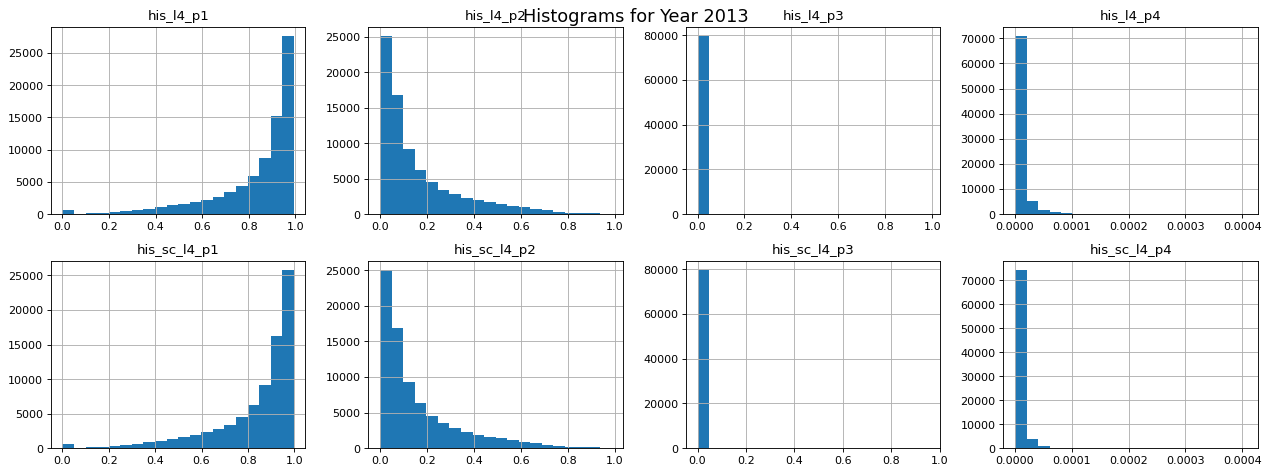

2014


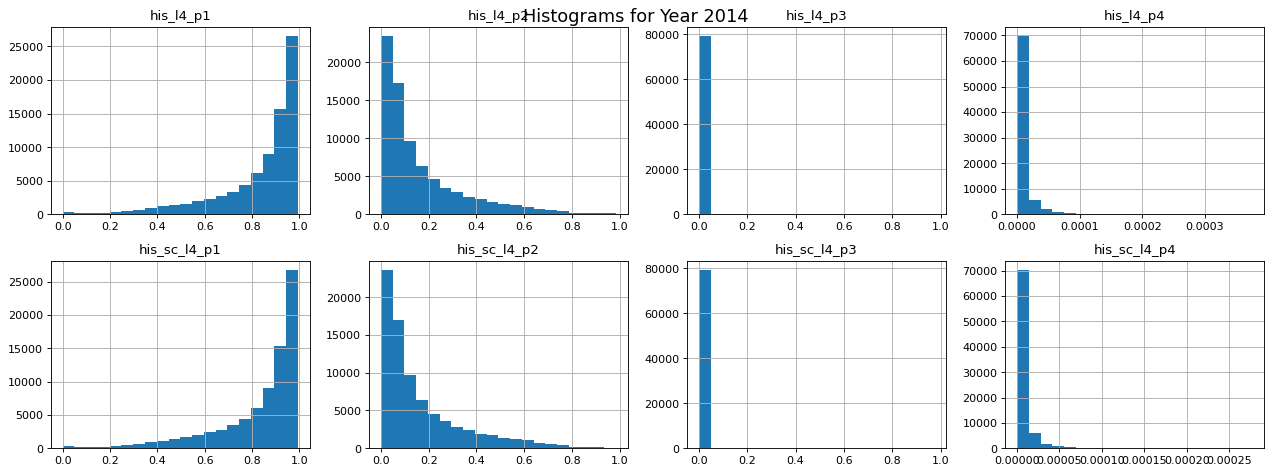

2015


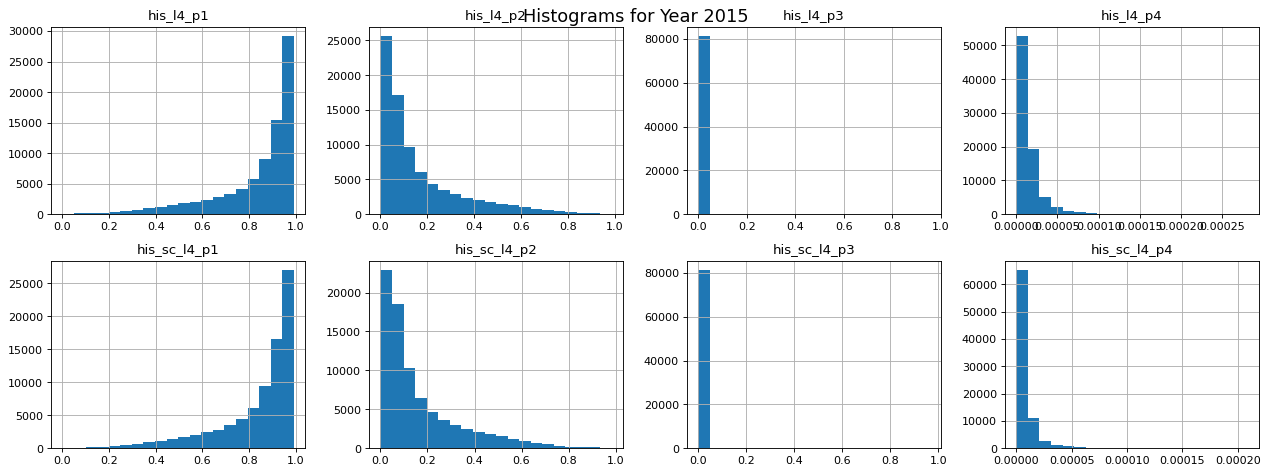

2016


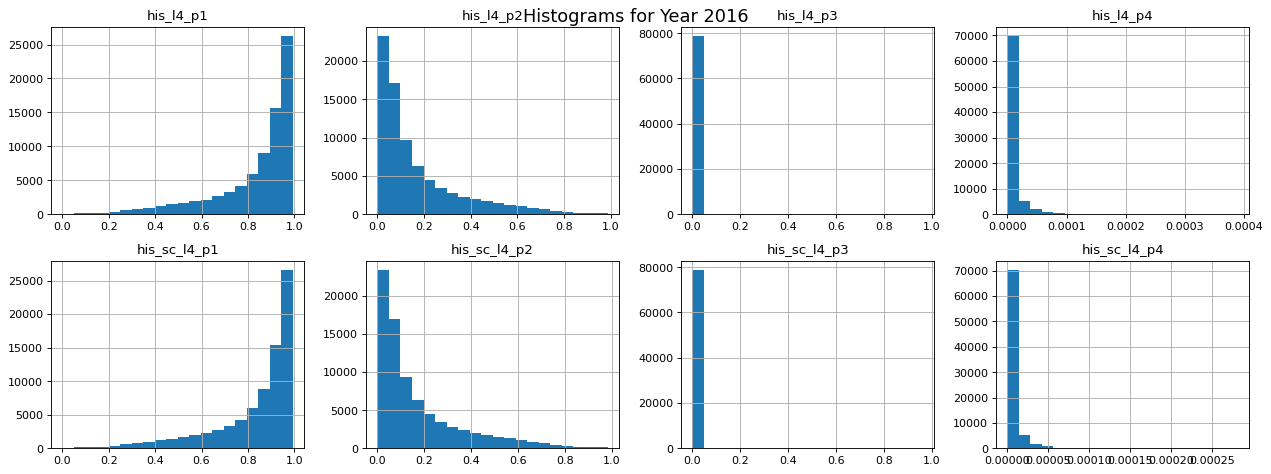

2017


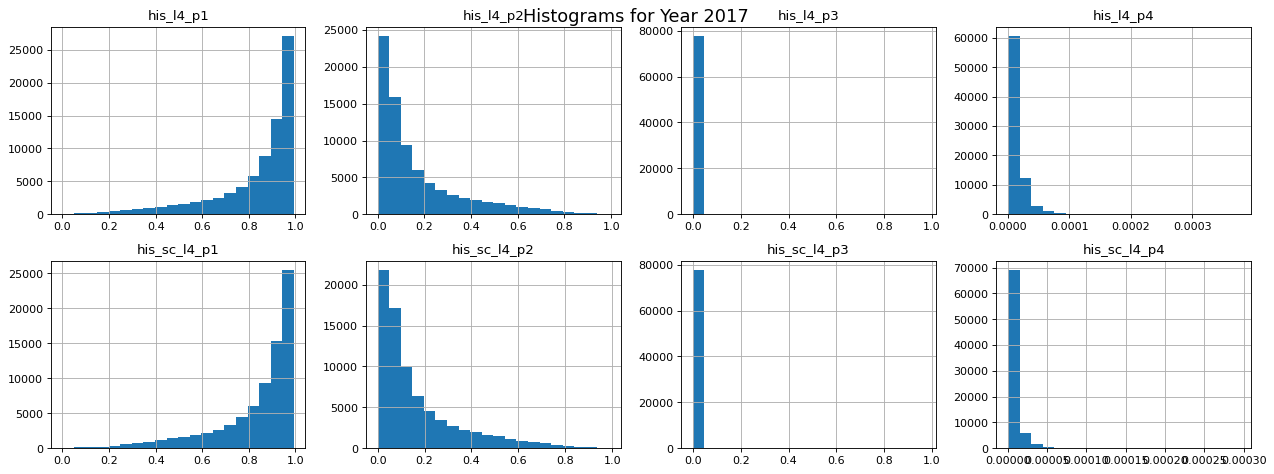

2018


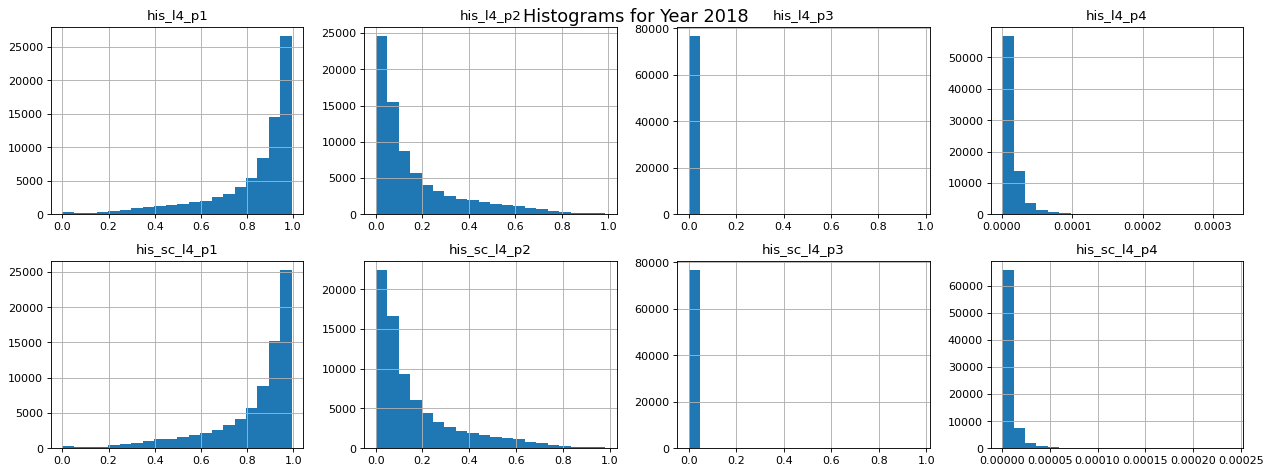

2019


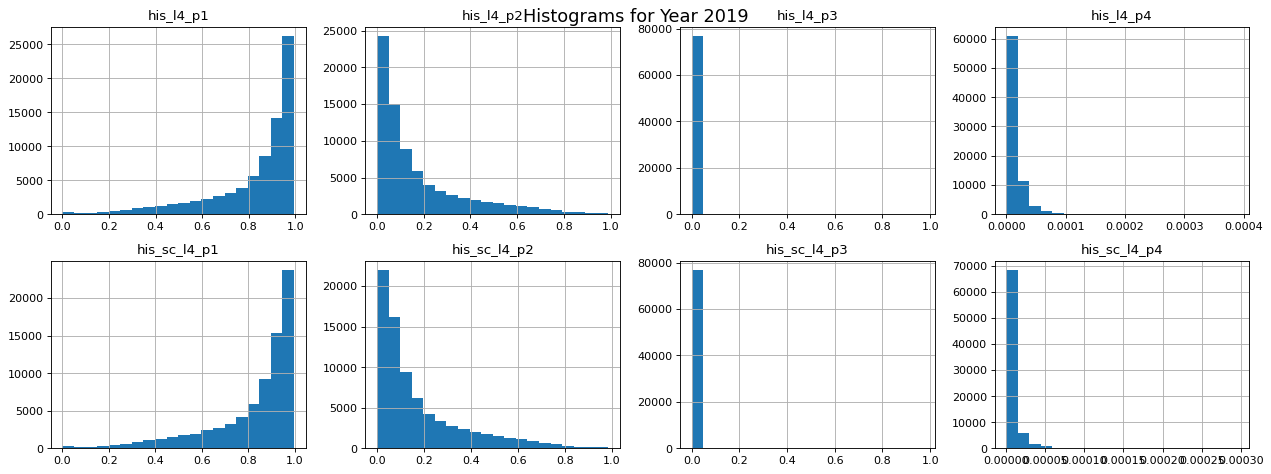

2020


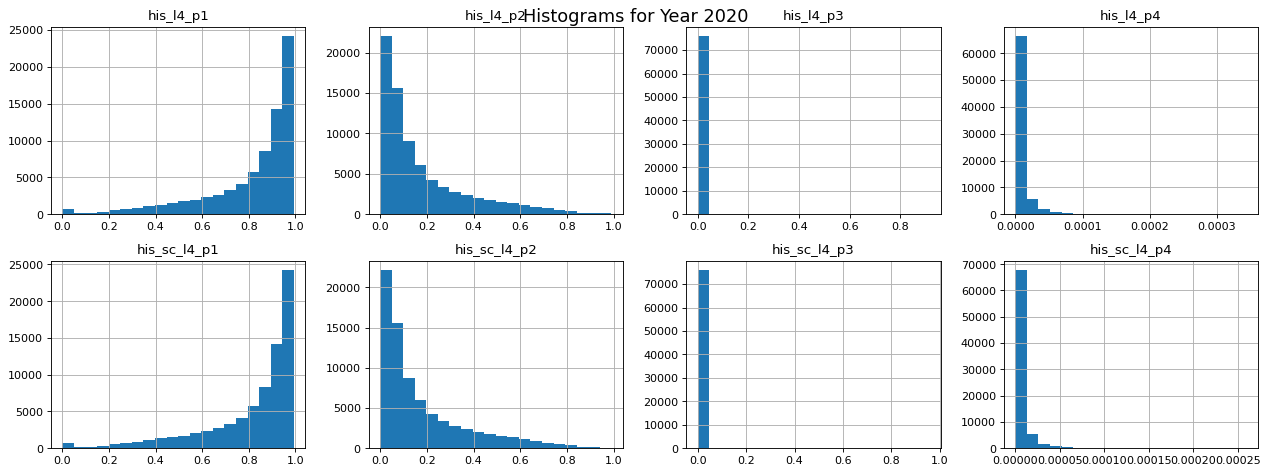

2021


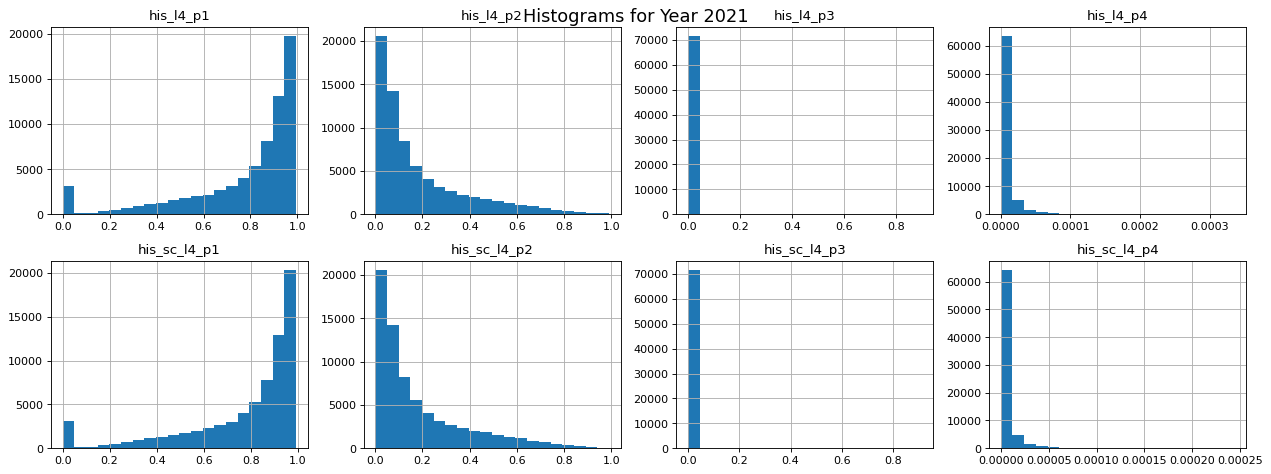

2022


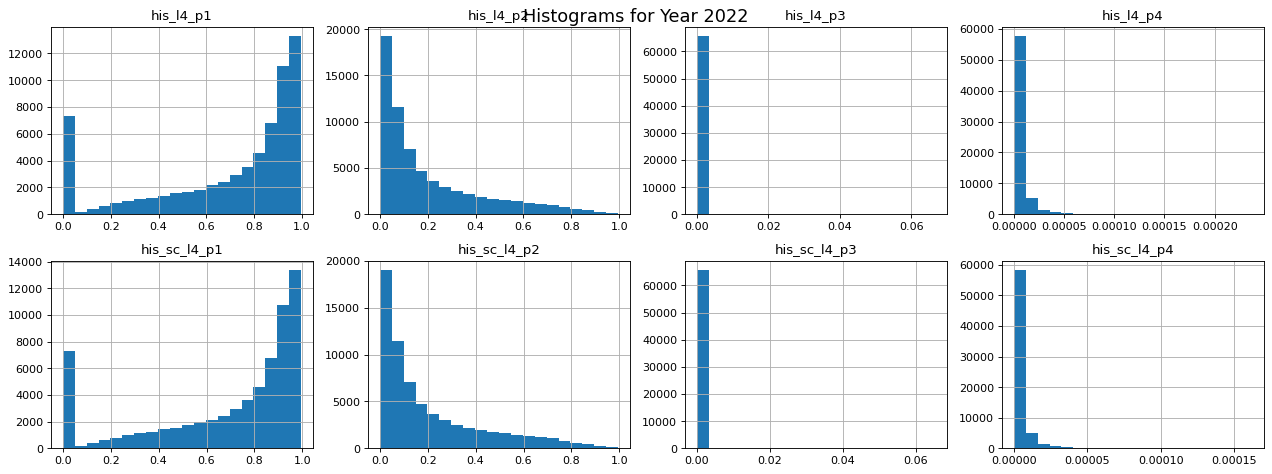

2023


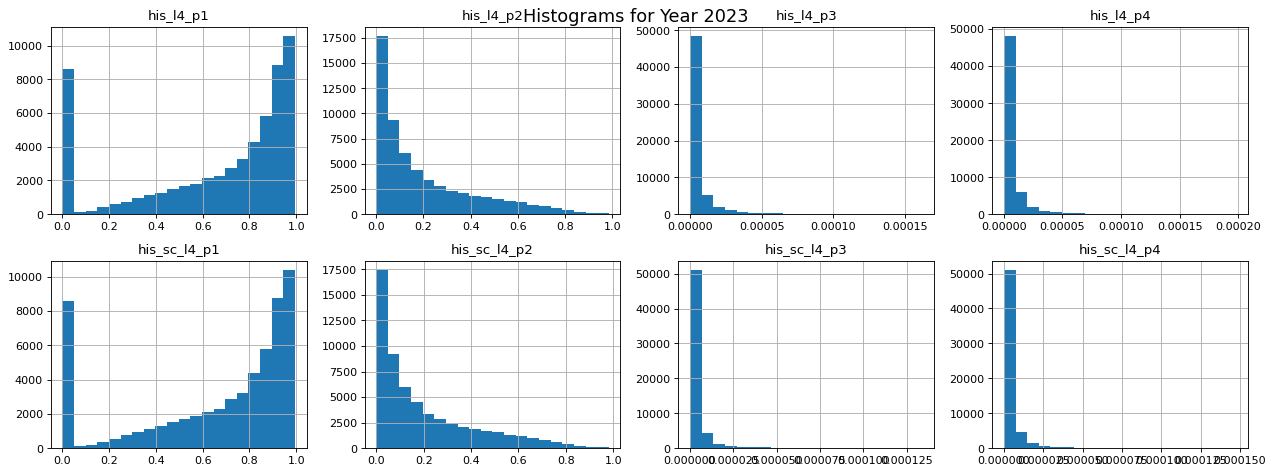

2024


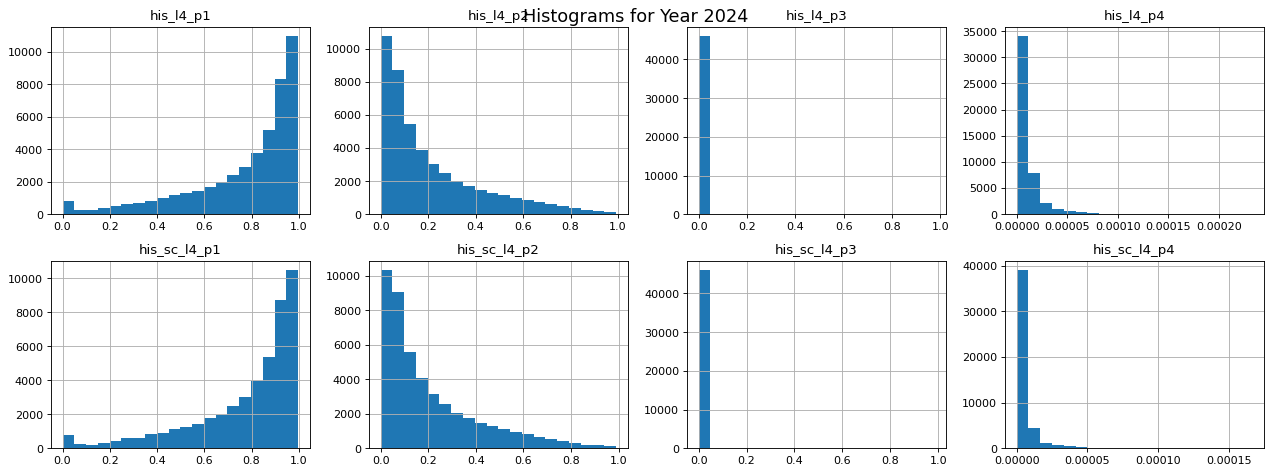

In [39]:
# ヒストグラムの作成 (グラフの行数、列数、解像度を適宜変更)
plot_histograms(dict_statistics, rows=2, cols=4, dpi=80)